# Assignment 6 


This notebook contains the questions for Assignment 6. 

Please note, a random seed has been set to ensure the reproducibility of the results -- *DO NOT* change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed to 42 as well**. 

Make sure to complete this assignment individually and appropriately reference all external code and documentation used. ***In order for your submission to be valid, you must adhere to the function definitions which have been made (failure to do so will result in a grade of 0). You must upload this completed Jupyter Notebook file as your submission (other file types are not permitted and will result in a grade of 0).*** You are responsible for selecting and importing additional packages.

In [1]:
import numpy as np
np.random.seed(42)

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import time

## Dataset Description

Attached with the assignment instructions, you will find the datasets.zip file. After unzipping the file, you will find two .csv files, where each file represents real-world measurement data of a heat experiment inside a steel furnace. "normal.csv" has all the normal experimental samples, while "anomalous.csv" has all the abnormal experimental samples.

In the datasets, the features are the vibration measurements in columns A, B, ... , H, which correspond to (X1, X2, ... , X8) measurement signals. Each feature represents a vibration signal inside the furnace at several frequency bands. Each example is a measurement recorded at a time instance (Timestamp), which are considered time-series data measurements.

## Question 1 - Data Preparations [10 Marks]

A) Read "normal.csv" as a pandas dataframe "normalData", and print out the shape of the normal dataset.

B) Read "anomalous.csv" as a pandas dataframe "anomalousData", and print out the shape of the nomalous dataset.


In [3]:
### Q1A) - 5pts
normalData = pd.read_csv('normal.csv')
print("normalData's shape:", normalData.shape)

normalData's shape: (76593, 10)


In [4]:
### Q1B) - 5pts
anomalousData = pd.read_csv('anomalous.csv')
print("anomalousData's shape:", anomalousData.shape)

anomalousData's shape: (2599, 10)


## Question 2 - Supervised Learning Algorithms [50 Marks]

A) Complete the myTrainTestSplit function, which takes as input **two dataframes** consisting of the normal and anomalous datasets, reserves 30 percent of each dataframe for testing and **returns 4 variables, Xtrain, Xtest, ytrain, and ytest**. 

*Note: you can use `concat` from pandas library to concatenade trainig sets from two dataframes, and test sets from two dataframes.*


B) Apply a Decision Tree model for classifying the events as normal or anomalous. Fill in the myDecisionTree function, which accepts as input the training set and returns a fully trained model. 

C) Apply a Bagging model that consists of 10 base decision trees for classifying the events as normal or anomalous. Fill in the myBagging function, which accepts as input the training set and returns a fully trained model. 

D) Apply a Random Forest model that consists of 10 base decision trees for classifying the events as normal or anomalous. Fill in the myRandomForest function, which accepts as input the training set and returns a fully trained model. 

E) Based on the trained Random Forest model from 2D, use a horizontal bar plot to plot the feature importance scores of all features (Timestamp, X1-X8).

F) Fill in the myEvaluateSupervisedModelPerformance function, which takes as input the training and test sets. Please note, you will need to call your functions from 2B, 2C, and 2D within this function to train your models. 
- Calculate the training time for comparing models. 
- Evaluate the performance of your models using 3 metrics of `Recall`, `Preceision` and `f1 score`. Return three numpy arrays consisting of the three metrics calculated for each model on the test set and print them out. 
- Also, print out the confusion matrix of your three models on the test set. 

G) **Written Answer** - Use the markdown cell to answer the following:
- Justify the choice of three metrics for the evaluation of the model's performance.
- Compare the performance and training time of the Decision Tree and Bagging models and discuss the reasons for the performance difference.
- Compare the performance and training time of the Bagging and Random Forest models and discuss the reasons for the performance difference.

In [5]:
### Q2A) - 5pts 
cols = ['Timestamp','X1','X2','X3','X4','X5','X6','X7','X8']
def myTrainTestSplit(normal, anomalous):
    nor_Xtrain, nor_Xtest, nor_ytrain, nor_ytest = train_test_split(normal[cols],normal.Anomaly_Tag,test_size=.3,random_state=42)
    ano_Xtrain, ano_Xtest, ano_ytrain, ano_ytest = train_test_split(anomalous[cols],anomalous.Anomaly_Tag,test_size=.3,random_state=42)
    Xtrain = pd.concat([nor_Xtrain, ano_Xtrain])
    Xtest = pd.concat([nor_Xtest, ano_Xtest])
    ytrain = pd.concat([nor_ytrain, ano_ytrain])
    ytest = pd.concat([nor_ytest, ano_ytest])
    return(Xtrain, Xtest, ytrain, ytest)

Xtrain, Xtest, ytrain, ytest = myTrainTestSplit(normalData, anomalousData)

In [6]:
### Q2B) - 5pts
def myDecisionTree(Xtrain, ytrain):
    model = DecisionTreeClassifier(random_state = 42)
    model.fit(Xtrain,ytrain)
    return model

In [7]:
### Q2C) - 5pts
def myBagging(Xtrain, ytrain):
    model = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
    model.fit(Xtrain, ytrain)
    return model

In [8]:
### Q2D) - 5pts
def myRandomForest(Xtrain, ytrain):
    model = RandomForestClassifier(n_estimators = 10, random_state = 42)
    model.fit(Xtrain, ytrain)
    return model

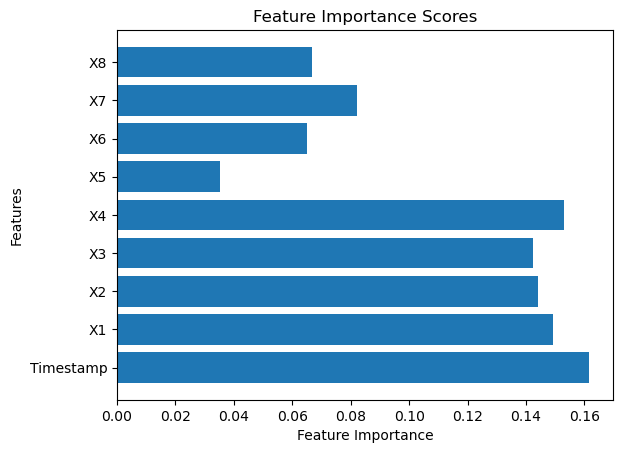

In [9]:
### Q2E) - 10pts
rf = myRandomForest(Xtrain, ytrain)
plt.barh(cols,rf.feature_importances_)
plt.title("Feature Importance Scores")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

In [13]:
### Q2F) - 10pts
def myEvaluateSupervisedModelPerformance(Xtrain, Xtest, ytrain, ytest):
    modelScores = []
    for modelType in (myDecisionTree, myBagging, myRandomForest):
        start = time.time()
        model = modelType(Xtrain,ytrain)
        end = time.time()
        ypred = model.predict(Xtest)
        recall = recall_score(ytest, ypred)
        precision = precision_score(ytest, ypred)
        f1 = f1_score(ytest, ypred)
        confusionMatrix = confusion_matrix(ytest, ypred)
        # print('Confusion Matrix of', modelType.__name__,'(Xtrain,ytrain) is', confusionMatrix)
        modelScores.append(np.array([modelType.__name__,(end-start),recall,precision,f1,confusionMatrix],dtype=object))
    return modelScores

modelsEval = myEvaluateSupervisedModelPerformance(Xtrain, Xtest, ytrain, ytest)

for data in modelsEval:
    print(data[0],':\n\tTime:',data[1],'s\n\tRecall Score:',data[2]*100,'%\n\tPrecision Score:',data[3]*100,'%\n\tF1 Score:',data[4]*100,'%\nConfusion Matrix:\n',data[5],'\n')

myDecisionTree :
	Time: 0.5973191261291504 s
	Recall Score: 91.41025641025641 %
	Precision Score: 89.91172761664565 %
	F1 Score: 90.65479974570884 %
Confusion Matrix:
 [[22898    80]
 [   67   713]] 

myBagging :
	Time: 4.309214115142822 s
	Recall Score: 92.17948717948717 %
	Precision Score: 98.09004092769442 %
	F1 Score: 95.04296100462656 %
Confusion Matrix:
 [[22964    14]
 [   61   719]] 

myRandomForest :
	Time: 1.8763890266418457 s
	Recall Score: 88.2051282051282 %
	Precision Score: 99.27849927849928 %
	F1 Score: 93.41479972844536 %
Confusion Matrix:
 [[22973     5]
 [   92   688]] 



#### Q2G) - 10 pts

**Witten Answer: Precision score measures the relevant data points, Recall score measures how accurately the model is able to identify relevant data, F1 score indicates that the model is good at identifying both positive and negative cases.**

**The Decision Tree is faster than the Bagging model but all the score values are lower.**

**The Random Forest is faster and has a slightly higher precision score than the Bagging model but the recall and f1 score values are lower.**

## Question 3 - Dimensionality Reduction [40 Marks]

A) Build the pipeline that uses a Principal Component Analysis (PCA) model to extract 2 principal components of the training set and create a a Random Forest model that consists of 50 base decision trees (same as the model in 2D).  Fill in the myPCARF function, which accepts as input the training set and returns a fully trained model. 

B) Fill in the myEvaluateUnsupervisedModelPerformance function, which takes as input the training and test sets. Please note, you will need to call your functions from 3A within this function to train your models. 
- Calculate the training time for comparing models. 
- Evaluate the performance of your model on the test set using the 3 same metrics from 2F. Return three numpy arrays consisting of the three metrics calculated for the model and print them out. 
- Also, print out the confusion matrix of your model on the test set. 

*Note: This function can be the same as the function from 2F, but remember to change the model name.*

C) **Written Answer** - Use the markdown cell to answer the following:
- Compare the performance and training time of PCA + Random Forest model from 3A and the Random Forest model from 2D, and discuss the reasons for the performance difference.

In [16]:
### Q3A) - 10pts
def myPCARF(Xtrain, ytrain):
    pipe = Pipeline([('pca', PCA()),
                    ('rf', RandomForestClassifier())])
    params = {'pca__n_components': [2],
              'rf__n_estimators': [10],
              'rf__random_state': [42]}
    model = GridSearchCV(pipe, params)
    model.fit(Xtrain, ytrain)
    return model

In [17]:
### Q3B) - 5pts
def myEvaluateUnsupervisedModelPerformance(Xtrain, Xtest, ytrain, ytest):    
    start = time.time()
    model = myPCARF(Xtrain,ytrain)
    end = time.time()
    ypred = model.predict(Xtest)
    recall = recall_score(ytest, ypred)
    precision = precision_score(ytest, ypred)
    f1 = f1_score(ytest, ypred)
    confusionMatrix = confusion_matrix(ytest, ypred)
    # print('Confusion Matrix of myPCARF(Xtrain,ytrain) is', confusionMatrix)
    modelScore = np.array(['myPCARF',(end-start),recall,precision,f1,confusionMatrix],dtype=object)
    return modelScore

data = myEvaluateUnsupervisedModelPerformance(Xtrain, Xtest, ytrain, ytest)

print(data[0],':\n\tTime:',data[1],'s\n\tRecall Score:',data[2]*100,'%\n\tPrecision Score:',data[3]*100,'%\n\tF1 Score:',data[4]*100,'%\nConfusion Matrix:\n',data[5],'\n')

myPCARF :
	Time: 4.742799282073975 s
	Recall Score: 39.871794871794876 %
	Precision Score: 67.75599128540306 %
	F1 Score: 50.20177562550444 %
Confusion Matrix:
 [[22830   148]
 [  469   311]] 



#### Q3C) - 10 pts

**Written Answer: myRandomForest is faster and much more accurate than myPCARF.**

**Random Forest model is iterating over possible splits that optimize for the criterion but PCA reduces the number of splits by summurazing data, thus the optimal splits are lost in the PCA process**